**Summary of the Data and Tasks to be done:**
>Supermarket Sales Data
Context
The growth of supermarkets in most populated cities are increasing and market 
competitions are also high. The dataset is one of the historical sales of supermarket company 
which has recorded in 3 different branches for 3 months data. Predictive data analytics 
methods are easy to apply with this dataset.
Format:

1. Invoice id: Computer generated sales slip invoice identification number
2. Branch: Branch of supercenter.
3. City: Location of supercenters
4. Customer type: Type of customers, recorded by Members for customers using 
   member card and Normal for without member card.
5. Gender: Gender type of customer
6. Product line: General item categorization groups - Electronic accessories, Fashion 
   accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and 
   travel
7. Unit price: Price of each product in $
8.Quantity: Number of products purchased by customer
9. Tax: 5% tax fee for customer buying
10. Total: Total price including tax
11. Date: Date of purchase 
12.Time: Purchase time 
13.Payment:Payment used by customer for purchase 
14. COGS: Cost of goods sold
15. Gross margin percentage: Gross margin percentage
16. Gross income: Gross income
17. Rating: Customer stratification rating on their overall shopping experience 


### Task:
1. Calculate the customer stratification accurately.
2. Segment Gross income for Branch of Superstore.
3. Visualise correlation between City and Gross Income.
4. Segment the customer type using ratings

In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

**Importing Data into DataFrame**

In [312]:
sales=pd.read_csv('supermarket.csv')

In [313]:
sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [314]:
sales["year"]=pd.DatetimeIndex(sales['Date']).year
sales["day"]=pd.DatetimeIndex(sales['Date']).day
sales["month"]=pd.DatetimeIndex(sales['Date']).month

In [315]:
sales["hour"]=pd.DatetimeIndex(sales['Time']).hour

In [316]:
sales.drop(['Date','Time'],axis=1,inplace=True)

In [317]:
sales.groupby('month')['gross income'].sum()

month
1    5537.708
2    4629.494
3    5212.167
Name: gross income, dtype: float64

### Conversion of Categorical Columns to Numerical Dtype

In [318]:
categorical_cols=sales.select_dtypes("object").columns.to_list()
categorical_cols

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

In [319]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [320]:
for col in categorical_cols:
    sales[col]=encoder.fit_transform(sales[col])

In [321]:
sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,year,day,month,hour
0,814,0,2,0,0,3,74.69,7,26.1415,548.9715,2,522.83,4.761905,26.1415,9.1,2019,5,1,13
1,142,2,1,1,0,0,15.28,5,3.8200,80.2200,0,76.40,4.761905,3.8200,9.6,2019,8,3,10
2,653,0,2,1,1,4,46.33,7,16.2155,340.5255,1,324.31,4.761905,16.2155,7.4,2019,3,3,13
3,18,0,2,0,1,3,58.22,8,23.2880,489.0480,2,465.76,4.761905,23.2880,8.4,2019,27,1,20
4,339,0,2,1,1,5,86.31,7,30.2085,634.3785,2,604.17,4.761905,30.2085,5.3,2019,8,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,153,2,1,1,1,3,40.35,1,2.0175,42.3675,2,40.35,4.761905,2.0175,6.2,2019,29,1,13
996,250,1,0,1,0,4,97.38,10,48.6900,1022.4900,2,973.80,4.761905,48.6900,4.4,2019,2,3,17
997,767,0,2,0,1,2,31.84,1,1.5920,33.4320,0,31.84,4.761905,1.5920,7.7,2019,9,2,13
998,308,0,2,1,1,4,65.82,1,3.2910,69.1110,0,65.82,4.761905,3.2910,4.1,2019,22,2,15


In [322]:
sales=sales.drop(["Invoice ID"],axis=1)

**Task-1: Calculate the customer stratification accurately.**

In [323]:
x=sales.drop(['Rating'],axis=1)
y=sales['Rating']

In [324]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [325]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler().fit(x_train)
x_train_sc=sc.transform(x_train)
x_test_sc=sc.transform(x_test)

In [326]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()

In [327]:
Lr.fit(x_train_sc,y_train)

LinearRegression()

In [328]:
train_pred=Lr.predict(x_train_sc)
from sklearn.metrics import mean_squared_error,accuracy_score
print(mean_squared_error(y_train,train_pred,squared=False))

1.6967576729989422


In [329]:
test_pred=Lr.predict(x_test_sc)
print(mean_squared_error(y_test,test_pred,squared=False))

1.7648676611345486


In [330]:
pd.DataFrame({'test_actual': y_test.values,
            'test_predict':test_pred})

,test_actual,test_predict
0,7.3,6.746030
1,9.0,7.143022
2,8.5,6.766837
3,9.3,6.817754
4,6.9,6.831689
...,...,...
195,5.5,7.028432
196,5.5,7.141728
197,5.1,6.802669
198,9.0,7.166461


**2. Segment Gross income for Branch of Superstore.**

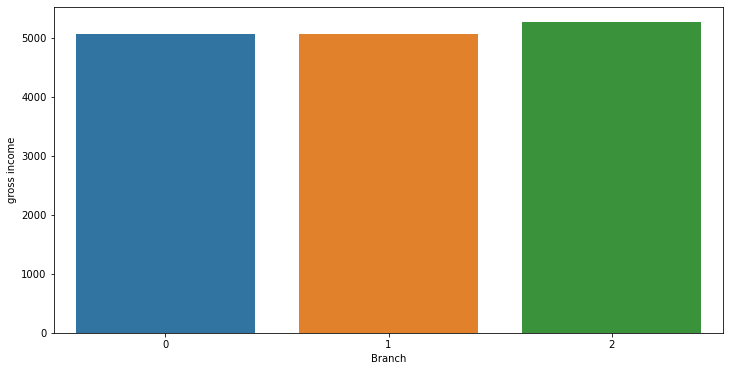

In [331]:
branch=sales[["Branch", "gross income"]].groupby(['Branch'], as_index=False).sum().sort_values(by='gross income', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x='Branch', y='gross income',data=branch)
plt.show()

In [332]:
branch

,Branch,gross income
2,2,5265.1765
0,0,5057.1605
1,1,5057.0320


In [333]:
from sklearn.cluster import KMeans

In [334]:
model = KMeans(n_clusters=3, init="k-means++",random_state=3)
model.fit(sales[['gross income']])

KMeans(n_clusters=3, random_state=3)

In [335]:
clusters=model.fit_predict(sales[['gross income']])
clusters

array([2, 0, 2, 2, 1, 1, 2, 1, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 0, 0, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 2, 1, 1, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 1,
       0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 0, 2, 0,
       0, 1, 1, 0, 1, 1, 0, 2, 1, 2, 2, 0, 1, 0, 1, 2, 0, 2, 0, 1, 2, 2,
       0, 2, 0, 2, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 2, 1,
       0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 1, 0, 2, 2, 1, 2, 1,
       0, 2, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 1, 0,
       1, 2, 0, 0, 1, 1, 2, 0, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 0, 2,
       0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 2, 0, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0,
       2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0,
       0, 1, 0, 1, 2, 2, 2, 0, 0, 0, 1, 2, 0, 2, 1, 2, 1, 0, 0, 1, 0, 2,
       0, 0, 2, 1, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0,

In [336]:
sales['branch_grossincome_cluster']=clusters
sales

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,year,day,month,hour,branch_grossincome_cluster
0,0,2,0,0,3,74.69,7,26.1415,548.9715,2,522.83,4.761905,26.1415,9.1,2019,5,1,13,2
1,2,1,1,0,0,15.28,5,3.8200,80.2200,0,76.40,4.761905,3.8200,9.6,2019,8,3,10,0
2,0,2,1,1,4,46.33,7,16.2155,340.5255,1,324.31,4.761905,16.2155,7.4,2019,3,3,13,2
3,0,2,0,1,3,58.22,8,23.2880,489.0480,2,465.76,4.761905,23.2880,8.4,2019,27,1,20,2
4,0,2,1,1,5,86.31,7,30.2085,634.3785,2,604.17,4.761905,30.2085,5.3,2019,8,2,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,1,1,1,3,40.35,1,2.0175,42.3675,2,40.35,4.761905,2.0175,6.2,2019,29,1,13,0
996,1,0,1,0,4,97.38,10,48.6900,1022.4900,2,973.80,4.761905,48.6900,4.4,2019,2,3,17,1
997,0,2,0,1,2,31.84,1,1.5920,33.4320,0,31.84,4.761905,1.5920,7.7,2019,9,2,13,0
998,0,2,1,1,4,65.82,1,3.2910,69.1110,0,65.82,4.761905,3.2910,4.1,2019,22,2,15,0


**Task:3-Visualise correlation between City and Gross Income.**

<AxesSubplot:>

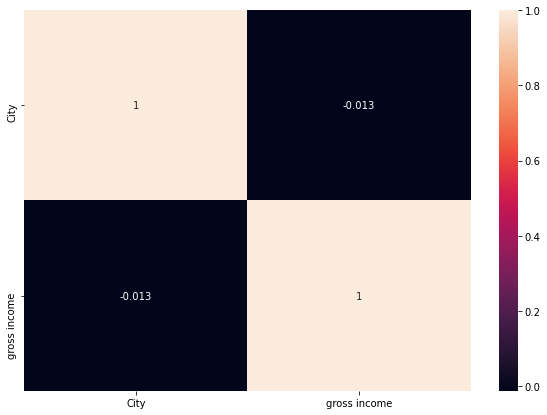

In [337]:
plt.figure(figsize=(10,7))
sns.heatmap(sales[['City','gross income']].corr(),annot=True)

**Task-4: Segment the customer type using ratings**

In [338]:
model = KMeans(n_clusters=5, init="k-means++",random_state=0)
model.fit(sales[['Rating']])

KMeans(n_clusters=5, random_state=0)

In [339]:
clusters=model.fit_predict(sales[['Rating']])
clusters

array([0, 0, 2, 3, 4, 1, 4, 3, 2, 4, 1, 2, 2, 3, 4, 1, 1, 2, 3, 1, 1, 1,
       1, 0, 4, 3, 2, 3, 0, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 3, 3, 4, 4, 2,
       2, 0, 3, 1, 3, 3, 0, 3, 2, 4, 2, 3, 4, 2, 4, 0, 0, 2, 0, 3, 2, 4,
       2, 0, 4, 1, 0, 4, 1, 3, 0, 4, 3, 4, 2, 4, 4, 4, 2, 3, 2, 1, 0, 2,
       4, 4, 2, 3, 1, 3, 2, 2, 1, 1, 0, 2, 1, 2, 1, 0, 3, 2, 3, 2, 1, 0,
       1, 3, 3, 1, 0, 2, 4, 1, 4, 1, 1, 2, 1, 1, 2, 1, 0, 4, 3, 2, 2, 3,
       2, 3, 4, 4, 3, 0, 3, 0, 4, 3, 0, 3, 3, 0, 0, 4, 4, 1, 1, 2, 2, 0,
       0, 0, 4, 0, 4, 0, 3, 4, 2, 2, 4, 4, 1, 3, 2, 3, 4, 0, 4, 0, 3, 3,
       0, 1, 1, 0, 4, 3, 3, 4, 2, 3, 2, 2, 0, 4, 2, 1, 0, 4, 0, 1, 1, 4,
       3, 4, 2, 2, 0, 3, 4, 3, 0, 3, 1, 2, 4, 3, 1, 1, 2, 3, 3, 4, 3, 3,
       4, 4, 0, 3, 4, 0, 1, 0, 4, 2, 2, 3, 3, 2, 2, 1, 1, 3, 1, 1, 4, 4,
       4, 1, 3, 4, 1, 2, 3, 1, 4, 3, 2, 1, 0, 0, 0, 3, 2, 2, 4, 4, 4, 1,
       3, 3, 2, 0, 1, 2, 4, 0, 3, 1, 3, 4, 2, 4, 4, 0, 4, 3, 2, 3, 0, 2,
       2, 0, 1, 1, 2, 4, 1, 2, 4, 2, 4, 4, 1, 3, 2,

In [340]:
sales['Rating_cluster']=clusters
sales

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,year,day,month,hour,branch_grossincome_cluster,Rating_cluster
0,0,2,0,0,3,74.69,7,26.1415,548.9715,2,522.83,4.761905,26.1415,9.1,2019,5,1,13,2,0
1,2,1,1,0,0,15.28,5,3.8200,80.2200,0,76.40,4.761905,3.8200,9.6,2019,8,3,10,0,0
2,0,2,1,1,4,46.33,7,16.2155,340.5255,1,324.31,4.761905,16.2155,7.4,2019,3,3,13,2,2
3,0,2,0,1,3,58.22,8,23.2880,489.0480,2,465.76,4.761905,23.2880,8.4,2019,27,1,20,2,3
4,0,2,1,1,5,86.31,7,30.2085,634.3785,2,604.17,4.761905,30.2085,5.3,2019,8,2,10,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,1,1,1,3,40.35,1,2.0175,42.3675,2,40.35,4.761905,2.0175,6.2,2019,29,1,13,0,4
996,1,0,1,0,4,97.38,10,48.6900,1022.4900,2,973.80,4.761905,48.6900,4.4,2019,2,3,17,1,1
997,0,2,0,1,2,31.84,1,1.5920,33.4320,0,31.84,4.761905,1.5920,7.7,2019,9,2,13,0,3
998,0,2,1,1,4,65.82,1,3.2910,69.1110,0,65.82,4.761905,3.2910,4.1,2019,22,2,15,0,1
